## 1. Shannon's theorem in use.

In [6]:
import numpy as np
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import pylab as pl
from __future__ import division

Hereafter, we define a continuous signal that we sample and then we use Shannon's interpolation formula.

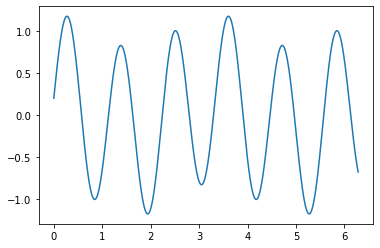

In [7]:
def mySignal(t):
    fq = 0.9
    fq2 = 0.3
    return np.sin(2*np.pi * fq*t) + 0.2*np.cos(2*np.pi * fq2*t)
x = np.linspace(0,2*np.pi,1000)
plt.plot(x,mySignal(x))
plt.show()

### Ex. Choose a sampling time $T_e$, sample this signal and then show the reconstruction using linear interpolation.

In [8]:
# copied from TD1

def interpolate_segments(s_num, Te_analog, ts_analog):
    N = s_num.shape[0]
    ts_num = np.arange(N)
    get_first_index  = lambda t_analog : int(t_analog / Te_analog)
    get_first_weight = lambda t_analog : 1 - (t_analog - get_first_index(t_analog) * Te_analog) / Te_analog
    def func(t_analog):
        i = get_first_index(t_analog)
        if i > N - 1:
            i = N - 1
        w = get_first_weight(t_analog)
        j = 0
        if i == N - 1:
            j = i
        else:
            j = i + 1
        return s_num[i] * w + s_num[j] * (1 - w)
    return np.array(list(map(func, ts_analog)))

def interpolate_shannon(s_num, Te_analog, ts_analog):
    # if Te >= 1 / (2 * fc):
    #    raise ValueError("Te should be compliant with the Shannon condition.")
    N = s_num.shape[0]
    ts_num = np.arange(N) * Te_analog
    sinc_shift = lambda t_analog : np.sinc((t_analog - ts_num) / Te_analog)
    func = lambda t_analog : np.sum(np.multiply(s_num, sinc_shift(t_analog)))
    return np.array(list(map(func, ts_analog)))



In [9]:
Te  = 0.1 # en secondes
N = 1000

# valeurs plus petite pour constater l'erreur de l'interpolation en segments
Te_analog = 0.01
N_analog = 100

ts_analog = np.arange(N_analog) * Te_analog



In [10]:
s_num = np.array(list(map(mySignal, ts_analog)))

s_shannon  = interpolate_shannon(s_num, Te_analog, ts_analog)
s_segments = interpolate_segments(s_num, Te_analog, ts_analog)

err_shannon = np.sum(np.abs(np.add(s_num, - s_shannon)) ** 2)
err_segments = np.sum(np.abs(np.add(s_num, - s_segments)) ** 2)


Erreur par segments:  3.7594152514438844e-31
Erreur par Shannon:   5.225393643547588e-28


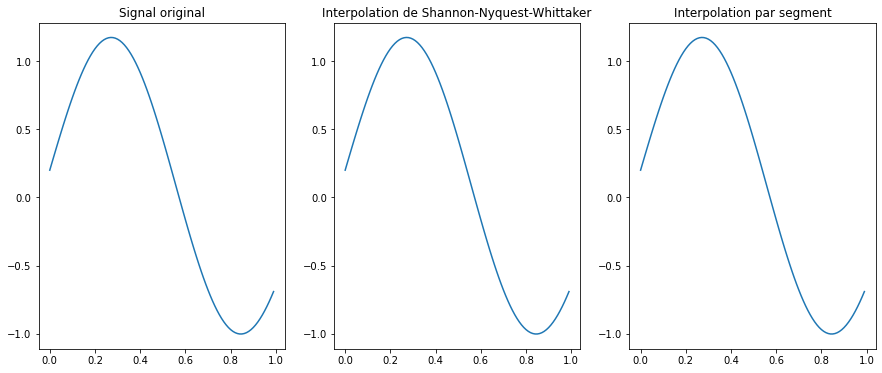

In [11]:
pl.figure(figsize = (15,6))

print("Erreur par segments: ", err_segments)
print("Erreur par Shannon:  ", err_shannon)

pl.subplot(1,3,1)
pl.plot(ts_analog, s_num)
pl.title("Signal original")

pl.subplot(1,3,2)
pl.plot(ts_analog, s_shannon)
pl.title("Interpolation de Shannon-Nyquest-Whittaker")

pl.subplot(1,3,3)
pl.plot(ts_analog, s_segments)
pl.title("Interpolation par segment")

pl.show()

### Ex. Implement Shannon's reconstruction function and implement the associated reconstruction formula. Change the input signal and compare with linear interpolation. What do you observe?


In [12]:
def my_original_signal_do_not_steal(t):
    return np.sin(2 * np.pi * 666 * t) + 69 * np.cos(2 * np.pi * 42 * t)

In [13]:
s_num = np.array(list(map(my_original_signal_do_not_steal, ts_analog)))

s_shannon  = interpolate_shannon(s_num, Te_analog, ts_analog)
s_segments = interpolate_segments(s_num, Te_analog, ts_analog)

err_shannon = np.sum(np.abs(np.add(s_num, - s_shannon)) ** 2)
err_segments = np.sum(np.abs(np.add(s_num, - s_segments)) ** 2)


Erreur par segments:  1.1987435652429869e-24
Erreur par Shannon:   1.3101226786789605e-23


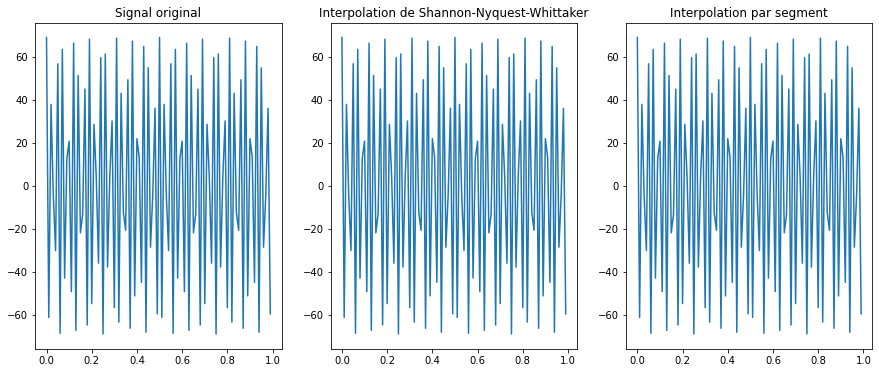

In [14]:
pl.figure(figsize = (15,6))

print("Erreur par segments: ", err_segments)
print("Erreur par Shannon:  ", err_shannon)

pl.subplot(1,3,1)
pl.plot(ts_analog, s_num)
pl.title("Signal original")

pl.subplot(1,3,2)
pl.plot(ts_analog, s_shannon)
pl.title("Interpolation de Shannon-Nyquest-Whittaker")

pl.subplot(1,3,3)
pl.plot(ts_analog, s_segments)
pl.title("Interpolation par segment")

pl.show()

L'interpolation de Shannon est toujours meilleur que l'interpolation par segments, mais cette différence n'est pas significative à l'échelle des signaux étudiés.

### Let us now observe the aliasing phenomenon by subsampling an image which presents high-frequency information.

(599, 493, 3)


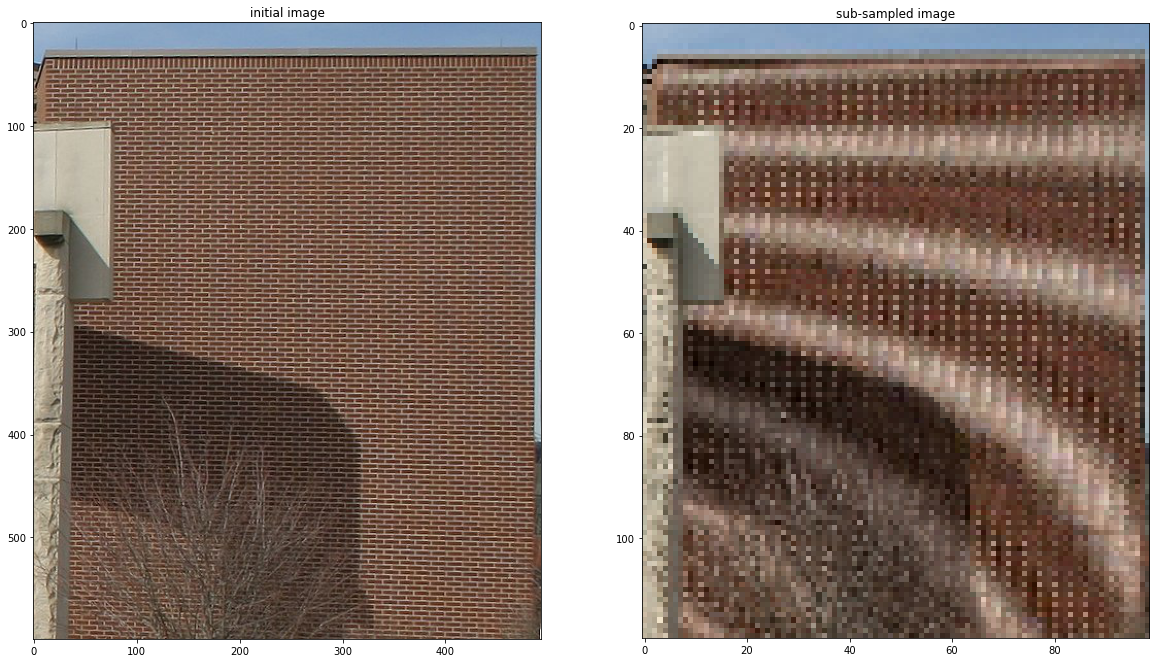

In [15]:
import imageio as imio
colored_image = imio.imread('res/Moire.jpg')
sub_defense = colored_image[::5,::5,:]
print(np.shape(colored_image))
#plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("initial image")
plt.imshow(colored_image)
plt.subplot(1,2,2)
plt.title("sub-sampled image")
plt.imshow(sub_defense)

(240, 365)


<Figure size 432x288 with 0 Axes>

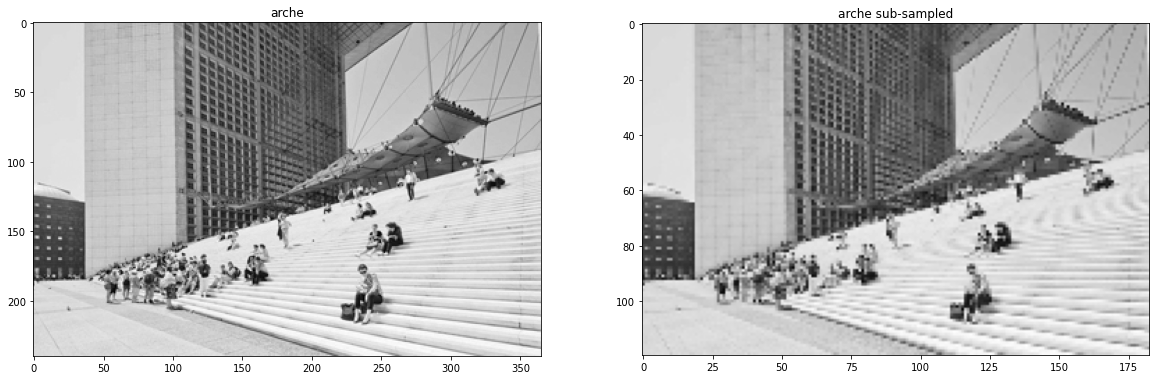

In [16]:
import imageio as imio
colored_image = imio.imread('res/services_0.jpg')
defense = np.sum(colored_image*[ 0.21, 0.72 ,0.07],axis=-1)
sub_defense = defense[::2,::2]
print(np.shape(defense))
plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("arche")
plt.imshow(defense)
plt.subplot(1,2,2)
plt.title("arche sub-sampled")
plt.imshow(sub_defense)


## 2. Simple exercice with the spectrum of a signal.

## A. On a 1D signal.

500


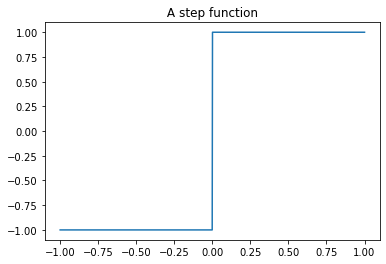

In [17]:
# Choose a grid x and a signal y
n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,n)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1
plt.plot(x,y)
plt.title(" A step function ");

In [18]:
# Use of FFT to compute the discrete Fourier transform
import scipy.fftpack as sf
spectre = sf.fft(y)
spectre_inverse = sf.ifft(spectre)

### Ex: Compute the $L^2$ of respectively the signal and its spectrum.
### Ex: Check numerically that the FFT and IFFT are numerical inverse of each others.

31.622776601683793
31.622776601683796


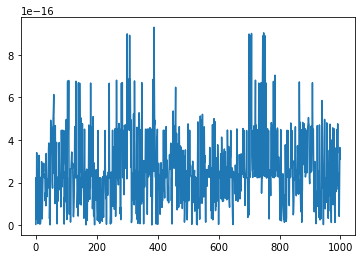

In [19]:
norm = np.linalg.norm(y)
norm_spectrum = np.linalg.norm(spectre)

print(norm)
print(norm_spectrum / 1 / np.sqrt(n))

freqs = sf.fftfreq(spectre.size, 1 / n)

plt.plot(np.abs(y - spectre_inverse)) # error in e-16 order of magnitude.

## Important remark:
The FFT output gives the DFT of the input for positive frequencies starting from $0$ on the first half of the vector and the negative frequencies on the second half starting always in increasing order. More precisely, we have that, if $y$ is the output,
$[y(0),y(1),..,y(n/2),y(1-n/2),...,y(-1)] $       if $n$ is even, $[y(0),y(1),..,y((n-1)/2),y(-(n-1)/2),...,y(-1)]$ otherwise.
In general, always use $fftshift$ to put low frequencies in the middle, which is the customary representation of the FFT.

Text(0.5, 1.0, ' The 0 frequency is in the middle. ')

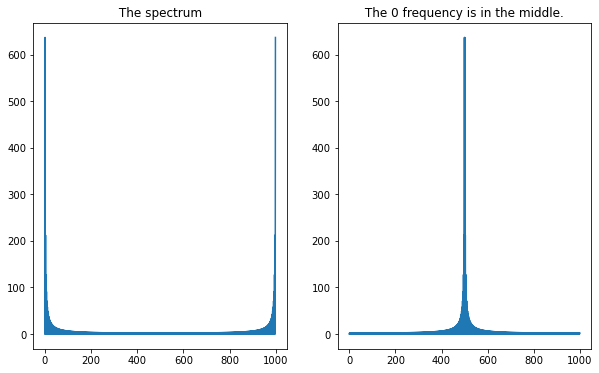

In [20]:
# illustration.
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(np.abs(spectre))
plt.title(" The spectrum ")
plt.subplot(1,2,2)
plt.plot(np.abs(sf.fftshift(spectre)))
plt.title(" The 0 frequency is in the middle. ")

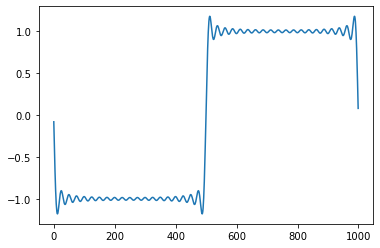

In [21]:
reduced = np.copy(spectre)
h = 40
reduced[h:n-h] = 0
reconstruct=sf.ifft(reduced)
plt.plot(np.real(reconstruct))

### Ex: Read the script above and explain what it does. The illustrated phenomenon is called the Gibbs phenomenon and is due to the slow convergence of the Fourier serie at the discontinuites of the signal.

## Answer. We run the signal through a low-pass filter in the frequency domain, then reconstruct the signal. The result is a rectangular signal, with the usual Gibbs side effect.

<ipython-input-22-efc14e8a9f6b>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(fq)));


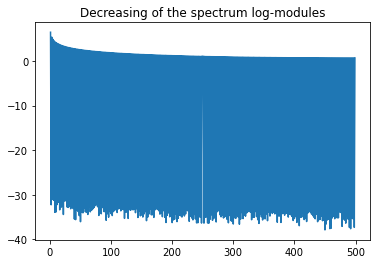

In [22]:
plt.title("Decreasing of the spectrum log-modules")
fq = spectre[:m]
plt.plot(np.log(np.abs(fq)));

### Ex: What can be observed on the shape of the spectrum ?
### Plot odd and even coefficients. Can you explain why?
### Why did we consider half of the signal?

Text(0.5, 1.0, ' Odd-numbered coefficients ')

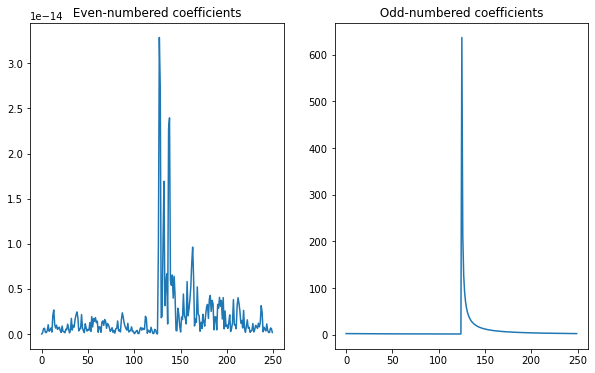

In [23]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(sf.fftshift(np.abs(fq[::2])))
plt.title(" Even-numbered coefficients ")
plt.subplot(1,2,2)
plt.plot(sf.fftshift(np.abs(fq[1::2])))
plt.title(" Odd-numbered coefficients ")
# plt.subplot(2,1,1)
# plt.plot(np.abs(fq))
# plt.title(" Total ")


## Answer. 
Large discrepancies between even and odd-numbered coefficients, odd-numbered get close to
The even coefficients are null, 
The positive frequencies are enough to know the signal if it is real: we know that its FT is symmetrical.

## B. On an image.

In [24]:
import scipy.signal as sig
from scipy import misc

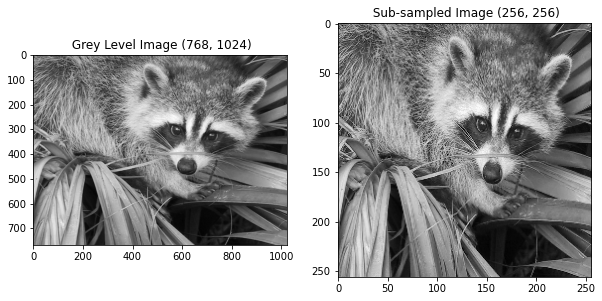

In [25]:
# load an image
image = misc.face(gray=True).astype(np.float32)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Grey Level Image " + str(np.shape(image)))
plt.imshow(image)
# sub-sample a matrix
image_sub = image[::3,::4]
plt.subplot(1,2,2)
plt.gray()
plt.title(" Sub-sampled Image " + str(np.shape(image_sub)))
plt.imshow(image_sub)

### Hereafter, we represent the logarithm of the module of the image spectrum.

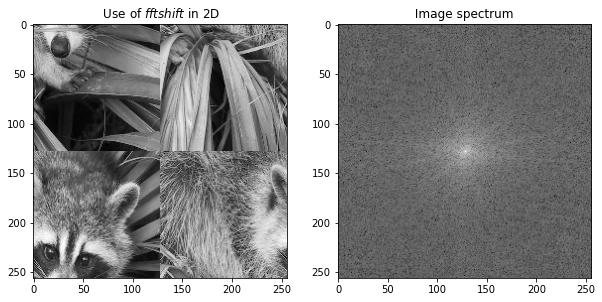

In [26]:
spectre_im = sf.fft2(image_sub)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Use of $fftshift$ in 2D ")
plt.imshow(sf.fftshift(image_sub))
plt.subplot(1,2,2)
plt.gray()
plt.title(" Image spectrum ")
plt.imshow(sf.fftshift(np.log(np.abs(spectre_im))))

### Ex: Explain what is the reason of appearance of the white lines in the frequency representation of the image. Propose and implement a solution to get rid of this artifact. We advise to use a mask on the initial image defined using $\sin$ or $\cos$ and then to compute the FFT.


From an image synthesis perspective, it means that the image was degraded as a result of sub-sampling : they are the result of discarding some pixels and creating discontinuity in the spatial domain. What might be able to reduce this edge effect is applying a blur to the spatial signal after sub-sampling, to smooth the image and curb the discontinuity.I don't get what a mask is supposed to mean in this context, so I guess I'll try convolution.

In [27]:

def get_sine_mask(width, height, power, omega1, omega2, phi, tau):
    thetas_width  = np.arange(1, step=1/width)
    thetas_height = np.arange(1, step=1/height)
    width_mask  = (2 + power * np.sin((2 * np.pi / omega1) * thetas_width  + phi)) / 2
    length_mask = (2 + power * np.sin((2 * np.pi / omega2) * thetas_height + tau)) / 2
    mask = np.empty((width, height))
    for ij, aij in np.ndenumerate(mask):
        mask[ij] = width_mask[ij[0]] * length_mask[ij[1]]
    return mask

def convolve(s1, s2):
    if s1.shape != s2.shape:
        raise ValueError("Nope.")
    shape = s1.shape
    return sf.fftshift(sf.ifftn(np.multiply(sf.fftn(s1, shape), sf.fftn(s2, shape)), shape))

def convolve_kernel(s, kernel, reduce_func):
    w   = s.shape[1]
    h   = s.shape[0]
    k_w = kernel.shape[1]
    k_h = kernel.shape[0]
    s_out = np.empty_like(s)
    # this is giving me out of range indices, for some reason.
    # for ij, aij in np.ndenumerate(s_out):
    for i in range(h):
        y_min = i - int(k_h / 2)
        y_max = i + int(k_h / 2)
        
        y1 = max(y_min, 0)
        y2 = min(y_max, h - 1)
        
        for j in range(w):
            x_min = j - int(k_w / 2)
            x_max = j + int(k_w / 2)
           
            x1 = max(x_min, 0)
            x2 = min(x_max, w - 1)
            
            s_window = s[y1 : y2 + 1, x1 : x2 + 1]
            kernel_window = kernel[y1 - y_min : k_h - (y_max - y2), x1 - x_min : k_w - (x_max - x2)]
            
            assert(s_window.shape == kernel_window.shape), str(s_window.shape) + " " + str(kernel_window.shape)
            
            mult = np.multiply(s_window, kernel_window)
            s_out[i][j] = reduce_func.reduce(mult, None)
    return s_out


In [28]:
omega1 = 0.02
omega2 = 0.02
phi = 0.5
tau = 0.2
power = 0.2

width = 27
height = 27


mask = get_sine_mask(width, height, power, omega1, omega2, phi, tau)


image_masked = convolve_kernel(image, mask, np.add).real

image_transformed = image_masked[::3, ::4]

image_transformed_ft = sf.fft2(image_transformed)

log_spectre = np.log(np.abs(spectre_im))

log_spectre_transformed = np.log(np.abs(image_transformed_ft))

diff = np.abs(log_spectre - log_spectre_transformed)

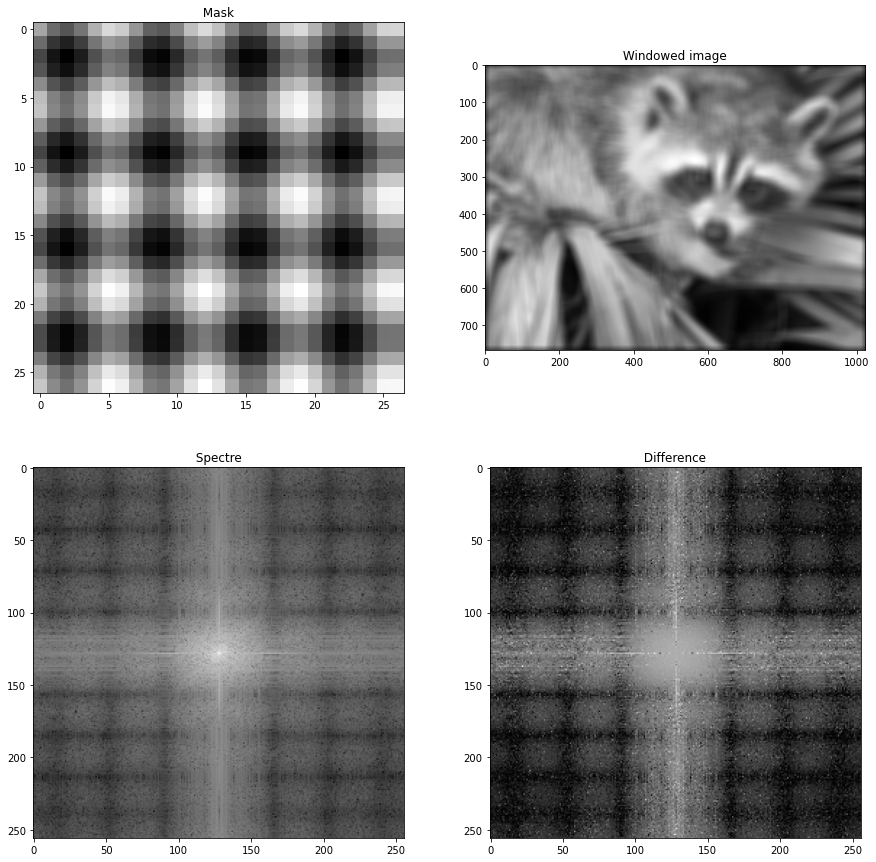

In [29]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.gray()
plt.title(" Mask ")
plt.imshow(mask)

plt.subplot(2,2,2)
plt.gray()
plt.title(" Windowed image ")
plt.imshow(image_masked)

plt.subplot(2,2,3)
plt.gray()
plt.title(" Spectre ")
plt.imshow(sf.fftshift(log_spectre_transformed))

plt.subplot(2, 2, 4)
plt.gray()
plt.title(" Difference ")
plt.imshow(sf.fftshift(diff))

plt.show()

No luck there.

## Hereafter, we construct an image from a random modification of the phase of the FFT of an image, which contains what is called texture information, that is repetitive patterns.

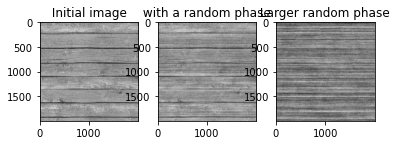

In [30]:
import imageio as imio
bois = imio.imread('res/wood.jpg')
texture_im = np.sum(bois*[ 0.21, 0.72 ,0.07],axis=-1)
spectre_im = sf.fft2(texture_im)
# construct the random phase. 
temp = 0.3 * np.random.rand(*np.shape(spectre_im))
random_phase = np.cos(2*np.pi * temp) + np.sin(2*np.pi*temp)*1j
new_spectrum = spectre_im*random_phase
temp_2 = 30 * temp
random_phase_2 = np.cos(2*np.pi * temp_2) + np.sin(2*np.pi*temp_2)*1j
new_spectrum_2 = spectre_im*random_phase_2
plt.subplot(1,3,1)
plt.title(" Initial image ")
plt.imshow(texture_im)
plt.subplot(1,3,2)
plt.title(" with a random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum)))
plt.subplot(1,3,3)
plt.title(" Larger random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum_2)))

In [31]:
def random_phase(shape, lower, higher):
    temp  = (higher - lower) * np.random.rand(*shape) + lower
    phase = np.cos(2*np.pi * temp) + np.sin(2*np.pi*temp)*1j
    return phase

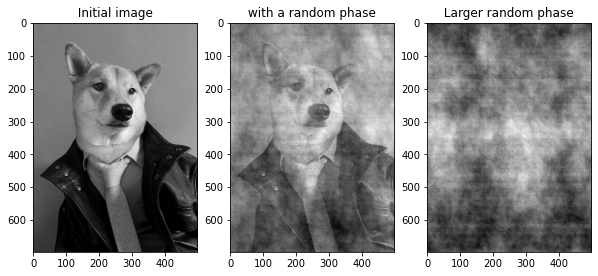

In [32]:
good_boi = imio.imread('res/dog.jpg')
texture_im = np.sum(good_boi * [ 0.21, 0.72 ,0.07],axis=-1) # to grey-scale.
spectre_im = sf.fft2(texture_im)

new_spectrum = spectre_im * random_phase(spectre_im.shape, 0, 0.3)
new_spectrum_2 = spectre_im * random_phase(spectre_im.shape, 0, 30)


plt.figure(figsize = (10,10))
plt.subplot(1,3,1)

plt.title(" Initial image ")
plt.imshow(texture_im)
plt.subplot(1,3,2)
plt.title(" with a random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum)))
plt.subplot(1,3,3)
plt.title(" Larger random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum_2)))

## Ex: Redo the experiment with the animal image. What do you observe?

## Answer: Changing the phase here makes the image unrecognisable, because it has no patterns like the wood texture does.

## 3. Convolution.

In [33]:
### Construct a gaussian filter.

def get_gaussian_filter(sigma, shape):
    
    arr = np.empty(shape = shape)
    size = np.asarray(shape)
    for it, el in np.ndenumerate(arr):
        arr[it] = np.sum(np.power(np.asarray(it / size) - 1 / 2,2)) / len(it)
    return np.power(1 / sigma * np.sqrt(2 * np.pi), len(shape)) * np.exp(- (1 / 2) * (arr / sigma) ** 2)

### Ex: Construct a gaussian filter of size $(256,256)$ and make a convolution of the animal image with this filter. Then, show the image and zoom in a particular region to better see the effect of the convolution when the filter has a small standard deviation.

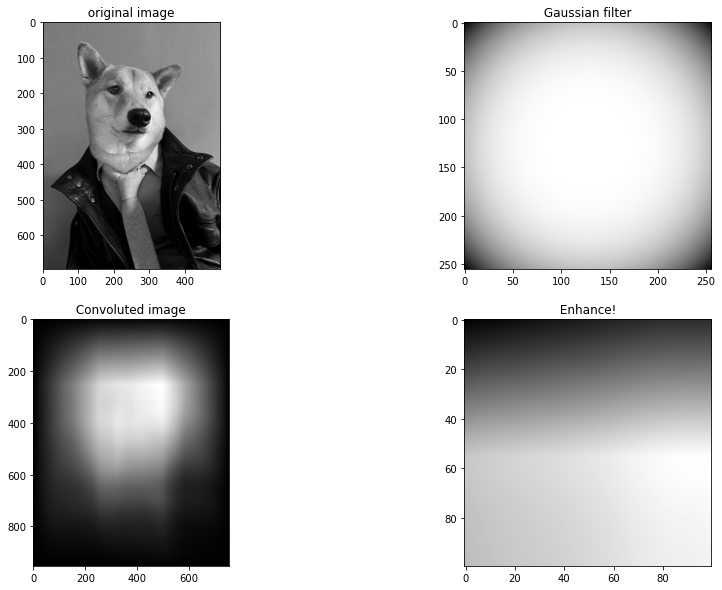

In [34]:
sigma = 2


gauss = get_gaussian_filter(sigma, (256, 256))

convoluted_boi = sig.convolve2d(texture_im, gauss)

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.title(" original image ")
plt.imshow(texture_im)

plt.subplot(2,2,2)
plt.title(" Gaussian filter ")
plt.imshow(gauss)

plt.subplot(2,2,3)
plt.title(" Convoluted image ")
plt.imshow(convoluted_boi)

plt.subplot(2,2,4)
plt.title(" Enhance! ")
plt.imshow(convoluted_boi[200:300, 400:500])


plt.show()

## Ex: Suppressing the aliasing effect. 
### Start with the arch image at full resolution, convolve it with a gaussian filter and subsample it as done in the aliasing experiment. Vary the constant of the gaussian filter and try to suppress the aliasing.

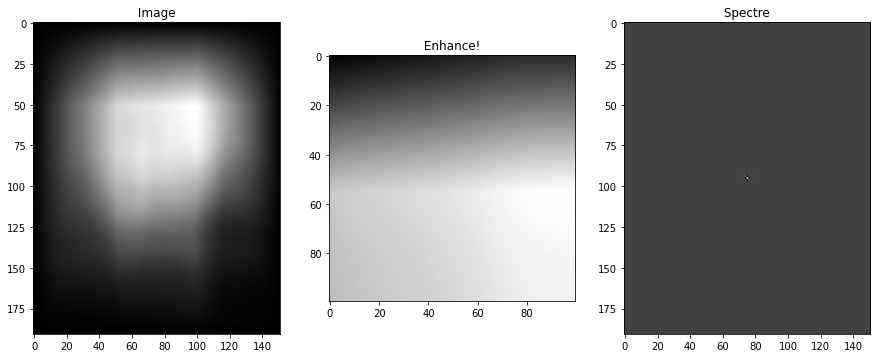

In [38]:
### your code here.
sigma = 0.1

subsampling = 5

gauss = get_gaussian_filter(sigma, (256, 256))

convoluluted_boi = sig.convolve2d(texture_im, gauss)

subsampled_boi = convoluted_boi[::subsampling, ::subsampling]

subsampled_spectre = sf.fft2(subsampled_boi).real

plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
plt.title(" Image ")
plt.imshow(subsampled_boi)

plt.subplot(1,3,2)
plt.title(" Enhance! ")
plt.imshow(convoluted_boi[200:300, 400:500])

plt.subplot(1,3,3)
plt.title(" Spectre ")
plt.imshow(sf.fftshift(subsampled_spectre))

plt.show()



### Answer: It kind of worked?

## 3. Linear and non-linear approximation.

In [47]:
### We define two measures to quantify the quality of the signal with respect to the ground truth.
### It is a quantity that is computed between x,y two images. They are called peaked signal to noise ratio,
### and signal to noise ration (psnr and snr).
def psnr(x, y, vmax=-1):
    d = np.mean((x - y) ** 2)
    if d ==0:
        return "Equal inputs"
    if vmax < 0:
        m1 = abs(x).max()
        m2 = abs(y).max()
        vmax = max(m1, m2)
    
    return 10 * np.log10(vmax ** 2 / d)

def snr(x, y):
    s =  np.linalg.norm(x - y)
    if s == 0:
        return "Equal inputs"
    return 20 * np.log10(np.linalg.norm(x) /s)

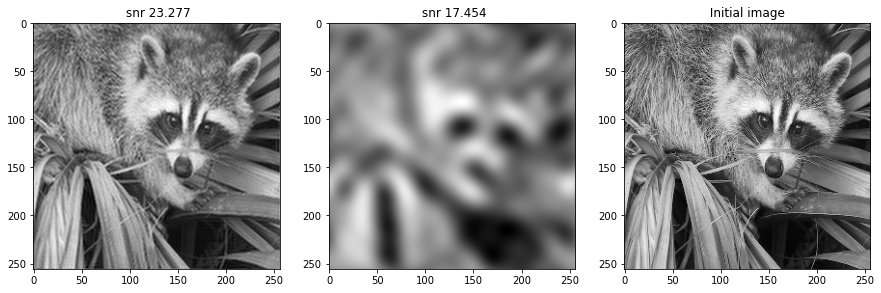

In [51]:
def LinearApproximation(x,n):
    if 2*n>=np.max(np.shape(x)):
        print("n out of bounds")
        return x
    spectre = sf.fftshift(sf.fft2(x))
    filtre = np.zeros_like(x)
    filtre[n:-n,n:-n] = 1
    result = np.real(sf.ifft2(sf.fftshift(filtre*spectre)))
    return result
approx1 = LinearApproximation(image_sub,60)
approx2 = LinearApproximation(image_sub,120)
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.title(" snr " + str(round(psnr(image_sub,approx1),3)))
plt.imshow(approx1)
plt.subplot(1,3,2)
plt.title(" snr " + str(round(psnr(image_sub,approx2),3)))
plt.imshow(approx2)
plt.subplot(1,3,3)
plt.title(" Initial image ")
plt.imshow(image_sub);

### Ex. Explain what is done in the previous cell.

### Answer: The LinearApproximation function (spatially) convolves the input signal with a rectangular window, by switching to the frequency domain and multiplying there. We are in fact reducing the frequency manifold with a low-pass filter, so that the reconstruction in the spatial domain is an approximation of the input signal. It is linear because we used a rectangular window?

### Ex: Redo the experiment but in considering the non-linear approximation of the image by taking the first $M$ larger coefficients in the spectrum. 
### Compare the linear and the non-linear approximation.

In [139]:
### Your code here.
def get_non_linear_approximation_filtre(x, M):
    def get_maxima(spectre, M):
        sorted_spectre = np.sort(spectre)
        lowest_maximum = -1
        maxima = []
        # Good lord, this is so bad.
        i = 0
        for ij, val in np.ndenumerate(sorted_spectre):
            if i >= M:
                lowest_maximum = val
                break
            i = i + 1
        for ij, val in np.ndenumerate(spectre):
            if np.abs(val) >= lowest_maximum:
                maxima.append(ij)
        return np.array(maxima)

    spectre = sf.fftshift(sf.fft(x))
    maxima =  get_maxima(spectre, M)
    print(maxima)
    filtre = np.zeros_like(x)
    filtre[maxima] = 1
    # well, it doesn't work anyway.
    return filtre

def get_non_linear_approximation(x, M):
    return sf.ifft2(sf.fftshift(get_non_linear_approximation_filtre(x, M) * sf.fftshift(sf.fft(x)))).real
            

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [255 253]
 [255 254]
 [255 255]]
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [255 253]
 [255 254]
 [255 255]]
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [255 253]
 [255 254]
 [255 255]]


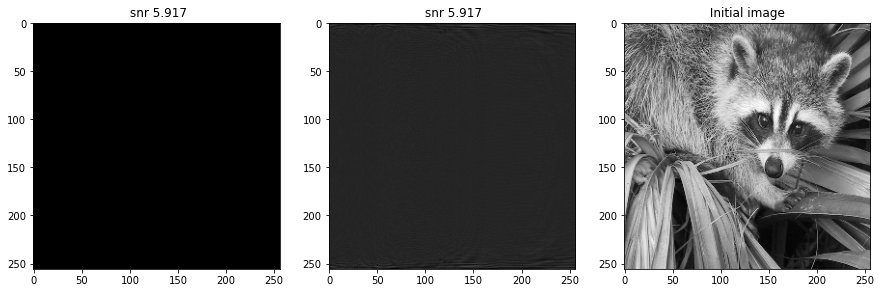

In [140]:
filtre1 = get_non_linear_approximation_filtre(image_sub, 4)

approx1 = get_non_linear_approximation(image_sub,4)
approx2 = get_non_linear_approximation(image_sub,8)
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.title(" snr " + str(round(psnr(image_sub,approx1),3)))
plt.imshow(filtre1)
plt.subplot(1,3,2)
plt.title(" snr " + str(round(psnr(image_sub,approx2),3)))
plt.imshow(approx2)
plt.subplot(1,3,3)
plt.title(" Initial image ")
plt.imshow(image_sub);

### Your answer here. By choosing the 'rifest' frequencies, we approximate the signal better while discarding less information.

## 4. STFT  (Short Time Fourier Transform) and source separation.

### In this part, we use STFT which is a collection of Fourier transform of a 1D signal on time subintervals. We use it in order to experiment source separation which comes from the idea that the different signals may present very different behaviour in the frequency domain.

In [ ]:
# utils to load the sounds.
import numpy as np
import wave as wv

def load_sound(file, n0):
    
    x_raw = wv.open(file)
    n = x_raw.getnframes()
    x = np.frombuffer(x_raw.readframes(-1), 'Int16')
    x_raw.close()
    
    if file[::-1][:8][::-1] == "bird.wav":
        x = np.delete(x,list(range(6001)) + list(range(12500, 15001)) + list(range(22500, 24001)) + list(range(32500,34001)))

    if n0 !=0 and n0 < n:
        x = x[:n0]
    
    return x/np.max(x)

## Hereafter, we load the $3$ sounds and plot the second one.

In [ ]:
n = 1024*16
s = 3 #number of signals.
x = np.zeros([n,3])
x[:,0] = load_sound("bird.wav",n)
x[:,1] = load_sound("female.wav",n)
x[:,2] = load_sound("male.wav",n)

x = x/np.tile(np.std(x,0),(n,1))
p = 2 #number of micros
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.xlim(0,n)
plt.plot(x[:,2])

### We simulate two micros which are implemented by linear combinations of the signals.

In [ ]:
theta = np.linspace(0, np.pi, s + 1)[:-1]
theta[0] = .2
M = np.vstack((np.cos(theta), np.sin(theta)))
## recovered signals
y = np.dot(x,np.transpose(M))

### We use the STFT function from the python package signal and plot it.

In [ ]:
import scipy.signal as sig
f,t,w = sig.stft(x[:,0])
a,b,z = sig.stft(x[:,1])
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("stft of signal 1")
plt.imshow(np.log(np.abs(w)))
plt.subplot(1,2,2)
plt.title("stft of signal 2")
plt.imshow(np.log(np.abs(z)))

### We numerically check that the STFT and ISTFT are indeed inverse from each others.

In [ ]:
micro1 = y[:,0]
micro2 = y[:,1]
stft = lambda im : sig.stft(im,noverlap = 64,nperseg = 128)
istft = lambda im : sig.istft(im,noverlap = 64,nperseg = 128)
f,t,w1 = stft(micro1)
f,t,w2 = stft(micro2)
t,recov = istft(w1)
print(np.sum((micro1 - recov)**2))

### By selecting randomly a group of points in time, we plot in the plane the coordinates of the points, being the measured signals by the micros.

In [ ]:
nbre_selec = 600
from random import shuffle
print(np.shape(y)[0])
liste = range(np.shape(y)[0])
shuffle(liste)
plot(y[liste[0:nbre_selec],0],y[liste[0:nbre_selec],1],"o",markersize=1)

### Q: Do the same with the STFT signals, what do you observe ?

In [ ]:
nbre_selec = 3000
from random import shuffle
H = np.asarray([np.imag(w1.flatten()),np.imag(w2.flatten())]).transpose()
liste2 = range(np.shape(H)[0])
shuffle(liste2)
plt.figure(figsize = (10,10))
plt.plot(H[liste2[0:nbre_selec],0],H[liste2[0:nbre_selec],1],"o",markersize=2);

### Q. Comment the code below after running it.

In [ ]:

#import math 
#Theta = np.zeros(np.shape(H)[0])
#for i in range(np.shape(H)[0]):
#    Theta[i] = math.atan2(H[i,1],H[i,0])%np.pi
#print(np.shape(Theta))

In [ ]:
#nbins = 400
#t = np.linspace(np.pi/200,np.pi,nbins)
#hist = np.histogram(Theta[:10000],t)
#h = hist[0]/np.sum(hist[0])
#t = t[:-1]

#plt.figure(figsize = (7,5))
#plt.bar(t, h, width = np.pi/nbins, color = "darkblue", edgecolor = "darkblue")
#plt.xlim(0,np.pi)
#plt.ylim(0,np.max(h))
#plt.show()

In [ ]:
## Affiche les valeurs d'angles les plus importantes.
#theta = []
#for xx in (h>0.01)*t:
#    if xx>0:
#        theta.append(xx)
#print(theta)

### Q. Comment the code below after running it ?

In [ ]:

projections = np.dot(Estimated,W)
C = np.abs(projections)
temp = np.max(C,0)
I = np.argmax(C,0)
threshold = .005
D = np.sqrt(np.sum(W**2, 0))
print(np.shape(D))
I = I*(D > threshold)

In [ ]:

masque = np.zeros_like(projections)
for i in range(np.shape(masque)[0]):
    masque[i] = 1*(I==i)
source_stft = projections * masque
print(np.shape(source_stft))

In [ ]:

MaListe = []
for i in range(3):
    f,t,w = stft(x[:,i])
    MaListe.append(w)
    print(np.shape(w))
    print(i,snr(np.abs(w.flatten()),np.abs(source_stft[i,:])))

In [ ]:
print(np.shape(MaListe[1]))

In [ ]:
i = 1
plt.figure(figsize = (40,40))
plt.subplot(1,2,1)
plt.title("stft of source")
plt.imshow(np.log(np.abs(MaListe[i])))
plt.subplot(1,2,2)
plt.title("stft of recovered signal")
plt.imshow(np.log(np.abs(source_stft[i,:]) + 1e-10).reshape(np.shape(MaListe[i])))


In [ ]:
X = []
for i in range(3):
    temp = source_stft[i,:].reshape(np.shape(MaListe[i]))
    X.append(istft(temp)[1])
h = X[0]
print(np.shape(h))

In [ ]:
i = 0
l = 600
m = 8000
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("recovered")
plt.xlim(l,m)
plt.plot(X[i])
plt.subplot(1,2,2)
plt.title("source")
plt.xlim(l,m)
plt.plot(x[:,i])
print(snr(X[i],x[:,i]))